In [1]:
import numpy as np
import visualization
from NeuralNetwork import*
np.random.seed(1)

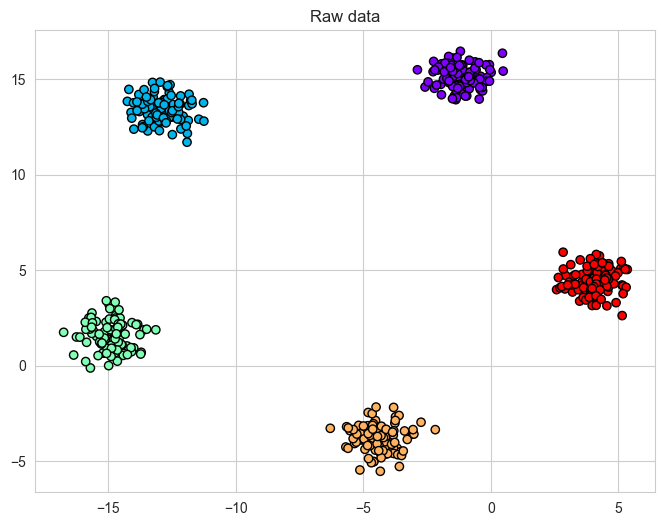

In [2]:
# load data
data = np.loadtxt('tren_data1___09.txt')
# data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [3]:
# shuffle data
data = np.random.permutation(data)
data_train = data[:int(len(data)*0.8)]
data_test = data[int(len(data)*0.8):]
x_train = data_train[:,:-1].T
y_train_raw = data_train[:,-1]
x_test = data_test[:,:-1].T
y_test = data_test[:,-1]
num_classes = len(np.unique(y_train_raw))

# to one hot
def to_one_hot(y, num_classes):
    y = y.astype(int)
    one_hot = np.zeros((num_classes, y.shape[0]), dtype=int)
    for i in range(y.shape[0]):
        one_hot[y[i]-1, i] = 1
    return one_hot
y_train = to_one_hot(y_train_raw, num_classes)
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print ('Number of training examples: ', x_train.shape[1])
print ('Number of testing examples: ', x_test.shape[1])
print ('------')
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)
print ('------')
print ('Number of classes: ', num_classes)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


In [5]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer, 10, 5] # set layer number and sizes

# parameters, costs = model(x_train, y_train, dims, learning_rate=0.0075, epochs = 2000, print_cost = True)
nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.sigmoid])
parameters = nn.parameters
costs = nn.train(x_train, y_train, learning_rate=0.0075, epochs = 1000, print_cost = True)

Training model...
Cost after iteration 0: [1.17121723 0.60602352 1.24488868 1.32662965 2.06182178]
Cost after iteration 100: [0.36430098 0.32494052 0.3627824  0.21302938 0.19514721]
Cost after iteration 200: [0.29374296 0.27761993 0.17409934 0.07672505 0.05953568]
Cost after iteration 300: [0.27314043 0.26313587 0.10608989 0.04004955 0.02669329]
Cost after iteration 400: [0.26523525 0.25171307 0.07466371 0.02589617 0.01562971]
Cost after iteration 500: [0.2586262  0.24144258 0.05807718 0.01935279 0.01107713]
Cost after iteration 600: [0.21226885 0.19370899 0.0466836  0.01507217 0.00943781]
Cost after iteration 700: [0.07122401 0.05957711 0.02972718 0.00987659 0.01062728]
Cost after iteration 800: [0.04215324 0.03107205 0.021076   0.00728608 0.00758939]
Cost after iteration 900: [0.03076597 0.02051802 0.01625024 0.00576604 0.00566567]
Cost after iteration 999: [0.0242551  0.01515267 0.01326216 0.00478727 0.00451988]


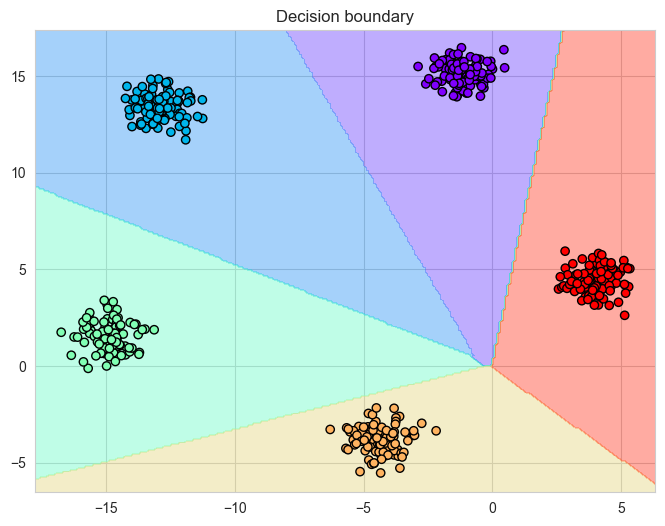

In [6]:
%matplotlib inline
visualization.plot_decision_boundary(data, nn, title='Decision boundary')


In [8]:
A = nn.forward_propagation(x_test)

accuracy:        1.0
confusion matrix: 


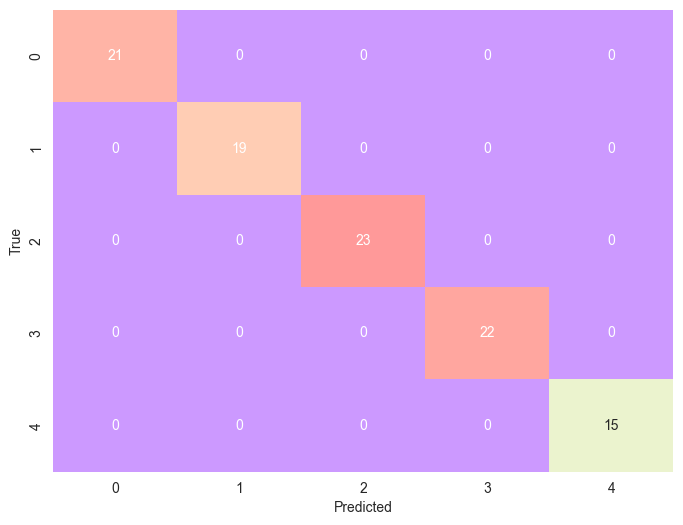

In [9]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy)
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

In [10]:
print(A.shape[0])
preds = np.argmax(A, axis=0)
print(preds)
print(np.array(y_test, dtype=int)[0])
import seaborn as sns
colors = sns.color_palette(palette='Set2')
print(colors)

5
[1 0 3 2 4 0 2 1 4 2 2 1 1 0 4 1 3 3 2 1 1 2 4 1 1 2 3 2 3 0 1 0 0 2 3 1 3
 3 0 0 0 2 0 4 0 4 3 4 0 1 4 1 4 2 2 2 3 3 0 3 0 3 3 0 4 1 0 3 2 2 0 0 3 4
 1 2 3 4 4 3 2 2 1 2 3 2 0 4 1 1 4 3 1 2 3 2 0 3 2 0]
[2 1 4 3 5 1 3 2 5 3 3 2 2 1 5 2 4 4 3 2 2 3 5 2 2 3 4 3 4 1 2 1 1 3 4 2 4
 4 1 1 1 3 1 5 1 5 4 5 1 2 5 2 5 3 3 3 4 4 1 4 1 4 4 1 5 2 1 4 3 3 1 1 4 5
 2 3 4 5 5 4 3 3 2 3 4 3 1 5 2 2 5 4 2 3 4 3 1 4 3 1]
[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


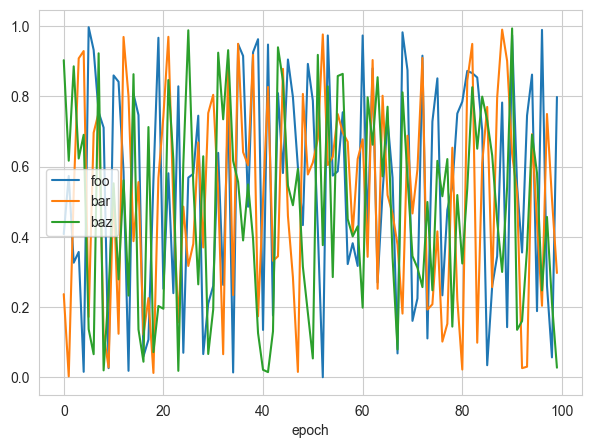

In [11]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()
    
    
# Then in a loop you populate a dictionary and you pass it to live_plot():

data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)